In [55]:
import numpy as np
import pandas as pd

In [56]:
data = pd.read_csv("kc_house_data.csv")
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [57]:
y = data['bedrooms']
y = y.apply(lambda x: 0 if x <= 3 else 1)
data = data.drop(columns=['bedrooms'])
data = data.drop(columns=['id'])
data = data.drop(columns=['date'])
y.head(10), data.columns

(0    0
 1    0
 2    0
 3    1
 4    0
 5    1
 6    0
 7    0
 8    0
 9    0
 Name: bedrooms, dtype: int64,
 Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
        'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
        'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
        'sqft_lot15'],
       dtype='object'))

Предобработка данных.

In [58]:
data.isna().sum()

price            0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [59]:
#пропусков в данных нет.

In [60]:
data.dtypes

price            float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Нормализуем числовые признаки.

In [61]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
X = data
X = pd.DataFrame(norm.fit_transform(X), columns = X.columns)
X.describe(), X.head()

(              price     bathrooms   sqft_living      sqft_lot        floors  \
 count  2.161300e+04  2.161300e+04  2.161300e+04  2.161300e+04  2.161300e+04   
 mean  -3.682080e-17 -1.788439e-16  2.419652e-16  1.052023e-17 -3.156068e-17   
 std    1.000023e+00  1.000023e+00  1.000023e+00  1.000023e+00  1.000023e+00   
 min   -1.266860e+00 -2.745920e+00 -1.948891e+00 -3.521759e-01 -9.154270e-01   
 25%   -5.941897e-01 -4.736214e-01 -7.108948e-01 -2.430487e-01 -9.154270e-01   
 50%   -2.453924e-01  1.756067e-01 -1.849914e-01 -1.808075e-01  1.053939e-02   
 75%    2.857709e-01  5.002207e-01  5.118578e-01 -1.066880e-01  9.365058e-01   
 max    1.950299e+01  7.641730e+00  1.247807e+01  3.950434e+01  3.714405e+00   
 
          waterfront          view     condition         grade    sqft_above  \
 count  2.161300e+04  2.161300e+04  2.161300e+04  2.161300e+04  2.161300e+04   
 mean  -5.260114e-18 -1.052023e-17 -2.577456e-16  2.524855e-16  1.104624e-16   
 std    1.000023e+00  1.000023e+00  1.

Разделим полученный набор данных на тестовую и обучающую выборку.

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.33, random_state = 1)

Построим классификатор типа логистическая регрессия.

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [64]:
Оценим точность построенного классификатора с помощью метрик precision, recall и F1 на тестовой выборке.

SyntaxError: invalid syntax (2076632720.py, line 1)

In [65]:
accuracy_score(y_validation, lr.predict(X_validation))

0.780036450301416

In [66]:
precision_score(y_validation, lr.predict(X_validation))

0.7651217596229379

In [67]:
recall_score(y_validation, lr.predict(X_validation))

0.6673518328194588

In [68]:
f1_score(y_validation, lr.predict(X_validation))

0.712900274473925

Accuracy, доля правильных ответов - 0.78

Precision, точность предсказания - 0.77

Recall, полнота модели - 0.67

f1_score, гармоническое среднее полноты и точности - 0.71

Построим классификатор типа случайный лес

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

Оценим точность построенного классификатора с помощью метрик precision, recall и F1 на тестовой выборке.

In [70]:
accuracy_score(y_validation, rf.predict(X_validation))

0.7979812140754241

In [71]:
precision_score(y_validation, rf.predict(X_validation))

0.7564191533657183

In [72]:
recall_score(y_validation, rf.predict(X_validation))

0.7468311065433367

In [73]:
f1_score(y_validation, rf.predict(X_validation))

0.7515945526633339

Accuracy, доля правильных ответов - 0.8

Precision, точность предсказания - 0.76

Recall, полнота модели - 0.75

f1_score, гармоническое среднее полноты и точности - 0.76

С помощью GridSearch переберем различные комбинации гиперпараметров.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
param_grid = { 'n_estimators': [50, 100, 150],'max_features': ['sqrt', 'log2'],'max_depth' : list(range(1, 10)), 'criterion' :['gini']}
RFC = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5, refit = True) 
RFC.fit(X_train, y_train)
print("\nшаг 50:")
print("f1:"+str(np.average(cross_val_score(RFC.best_estimator_, X_validation, y_validation, scoring='f1'))))
print("precision:"+str(np.average(cross_val_score(RFC.best_estimator_, X_validation, y_validation, scoring='precision'))))
print("recall:"+str(np.average(cross_val_score(RFC.best_estimator_, X_validation, y_validation, scoring='recall'))))



шаг 50:
f1:0.7410905854073112
precision:0.7366783423477821
recall:0.7492334171385606


In [25]:
print("\nшаг 50:")
print("f1:"+str(np.average(cross_val_score(RFC.best_estimator_, X_validation, y_validation, scoring='accuracy'))))
print("f1:"+str(np.average(cross_val_score(RFC.best_estimator_, X_validation, y_validation, scoring='f1'))))
print("precision:"+str(np.average(cross_val_score(RFC.best_estimator_, X_validation, y_validation, scoring='precision'))))
print("recall:"+str(np.average(cross_val_score(RFC.best_estimator_, X_validation, y_validation, scoring='recall'))))

param_grid = { 'n_estimators': [30, 60, 90],'max_features': ['sqrt', 'log2'],'max_depth' : list(range(1, 10)), 'criterion' :['gini']}
RFC = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5, refit = True) 
RFC.fit(X_train, y_train)

print("\nшаг 30:")
print("f1:"+str(np.average(cross_val_score(RFC.best_estimator_, X_validation, y_validation, scoring='accuracy'))))
print("f1:"+str(np.average(cross_val_score(RFC.best_estimator_, X_validation, y_validation, scoring='f1'))))
print("precision:"+str(np.average(cross_val_score(RFC.best_estimator_, X_validation, y_validation, scoring='precision'))))
print("recall:"+str(np.average(cross_val_score(RFC.best_estimator_, X_validation, y_validation, scoring='recall'))))

param_grid = { 'n_estimators': [10, 20, 30],'max_features': ['sqrt', 'log2'],'max_depth' : list(range(1, 10)), 'criterion' :['gini']}
RFC = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5, refit = True) 
RFC.fit(X_train, y_train)

print("\nшаг 10:")
print("f1:"+str(np.average(cross_val_score(RFC.best_estimator_, X_validation, y_validation, scoring='accuracy'))))
print("f1:"+str(np.average(cross_val_score(RFC.best_estimator_, X_validation, y_validation, scoring='f1'))))
print("precision:"+str(np.average(cross_val_score(RFC.best_estimator_, X_validation, y_validation, scoring='precision'))))
print("recall:"+str(np.average(cross_val_score(RFC.best_estimator_, X_validation, y_validation, scoring='recall'))))


шаг 50:
f1:0.7877450609415098
f1:0.739188313946813
precision:0.7348112746791424
recall:0.7495747080523508

шаг 30:
f1:0.786622746451672
f1:0.7417252791078275
precision:0.73285371645546
recall:0.7475216757912545

шаг 10:
f1:0.7782120220040081
f1:0.7381495181396728
precision:0.7331578782081506
recall:0.7362167814093377


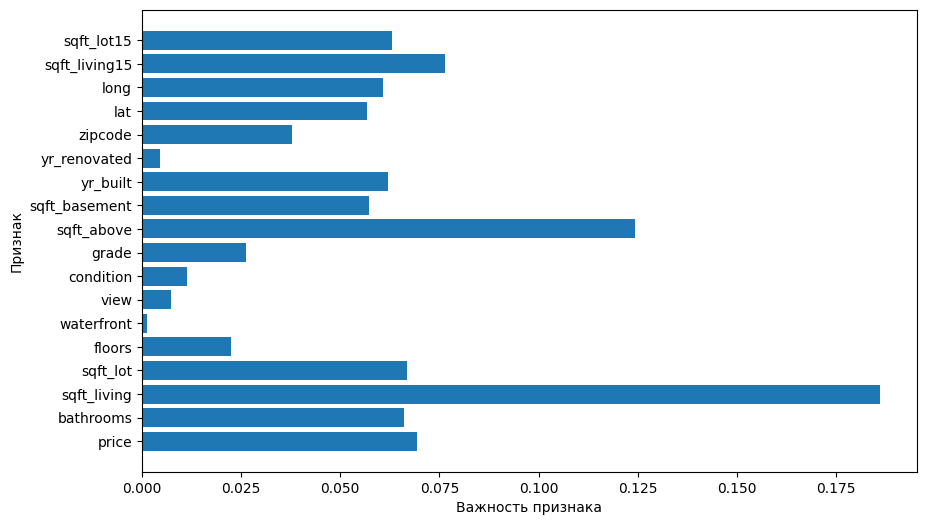

In [74]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Получим важности признаков
feature_importances = rf.feature_importances_

# Названия признаков
feature_names = X_train.columns

# Создание графика важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.show()

In [ ]:
Таким образом, наиболее значимым признаком для точности классификатора является 'sqft_living', наименее значимым - 'waterfront'